In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

import cartopy.crs as ccrs
import cartopy as cart
import cmocean
from matplotlib.animation import FuncAnimation
import numpy.fft as fft
import matplotlib.ticker as ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


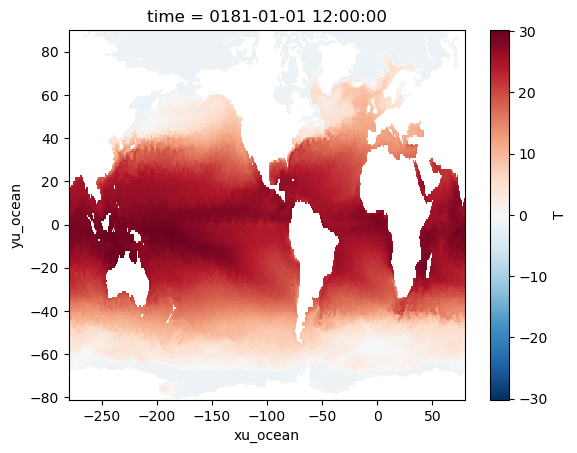

In [2]:
data = xr.open_zarr("/scratch/as15415/Data/Emulation_Data/Global_Ocean_1deg.zarr/")
data["T"][0].plot()

In [3]:
data = xr.open_zarr("/scratch/as15415/Data/Emulation_Data/Global_Ocean_1deg.zarr/")
data = data["T"]

# data_1 = data.sel(xu_ocean = slice(35,80))
# data_2 = data.sel(xu_ocean = slice(-280,-235))
# data_2["xu_ocean"] = data_2["xu_ocean"].data+360
# data = xr.concat([data_1,data_2],dim = "xu_ocean")
# data = data.sel(yu_ocean = slice(-40,30))

# Pacific


data = data.sel(xu_ocean = slice(-208,-80),yu_ocean = slice(-31,30))

wet =np.isnan(data[0])
wet = xr.where(wet==0,np.nan,0)    
wet = np.isnan(wet)
wet = np.nan_to_num(wet.to_numpy())
wet_bool = np.array(wet).astype(bool)

locs = np.argwhere(wet_bool)

Nx = data.xu_ocean.data.size
Ny = data.yu_ocean.data.size


In [4]:
data

<xarray.DataArray 'T' (time: 7305, yu_ocean: 64, xu_ocean: 128)>
dask.array<getitem, shape=(7305, 64, 128), dtype=float64, chunksize=(457, 17, 45), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xu_ocean  (xu_ocean) float64 -207.5 -206.5 -205.5 ... -82.5 -81.5 -80.5
  * yu_ocean  (yu_ocean) float64 -30.46 -29.59 -28.72 ... 27.84 28.72 29.59

In [5]:
clim = np.array(data.groupby('time.dayofyear').mean('time').compute())
clim = clim[:,wet_bool]
# clim = clim.mean(axis = [1,2])

In [6]:
def grid_vec(locs,to_plot):
    u = np.zeros((Ny,Nx))*np.nan

    u[locs[:,0],locs[:,1]] = to_plot.squeeze()
    return u

In [7]:
flattened = data[0:7305].to_numpy()[:,wet_bool]
# flattened = flattened/(flattened.mean())

In [8]:
for i in range(7305):
    day_yr = data.time.data[i].dayofyr-1
    flattened[i] = flattened[i] - clim[day_yr]

In [10]:
U, S, V = np.linalg.svd(flattened, full_matrices=False)

/state/partition1/job-46589970/ipykernel_1778859/1673697905.py:20: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(plot_1,aspect=12,shrink=.9)


Text(0.5, 1.0, 'PC1')

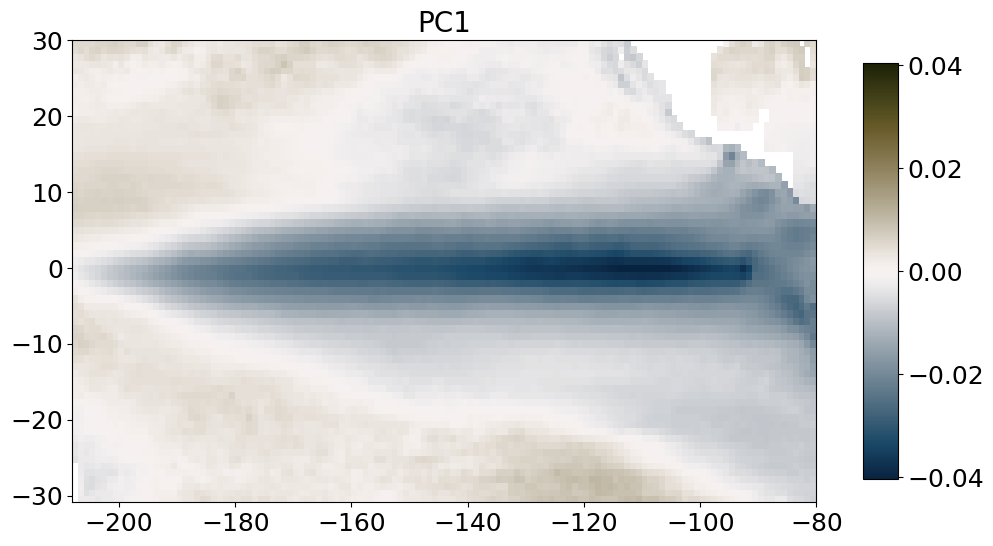

In [11]:
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)

fig, axs = plt.subplots(1, 1, figsize=(12,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       )
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[0,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

# axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
# gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.yrotation = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.9)
plt.title("PC1",fontsize=20)

/state/partition1/job-46589970/ipykernel_1778859/4283794907.py:20: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(plot_1,aspect=12,shrink=.9)


Text(0.5, 1.0, 'PC2')

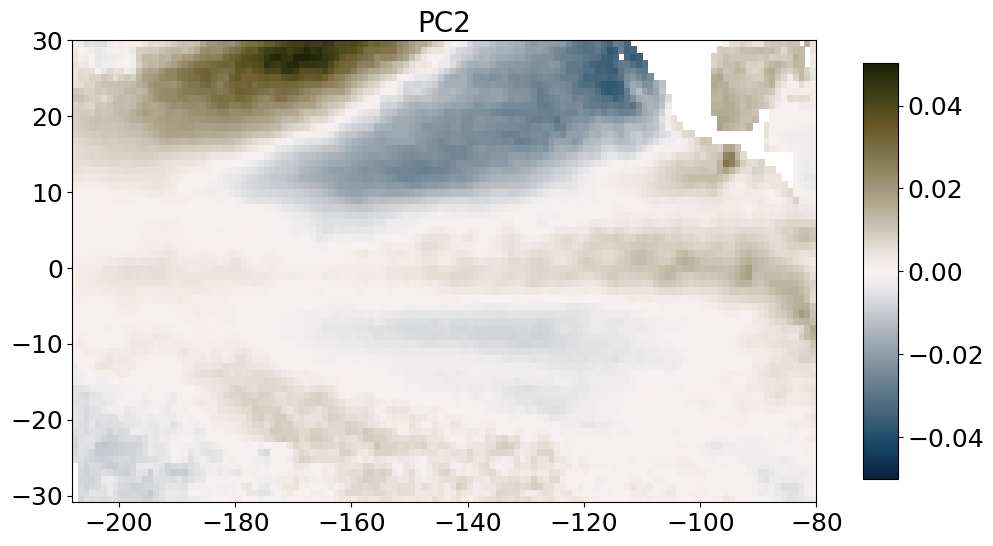

In [12]:
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)

fig, axs = plt.subplots(1, 1, figsize=(12,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       )
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[1,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

# axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
# gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.yrotation = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.9)
plt.title("PC2",fontsize=20)

/state/partition1/job-46589970/ipykernel_1778859/2646049565.py:20: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(plot_1,aspect=12,shrink=.9)


Text(0.5, 1.0, 'PC3')

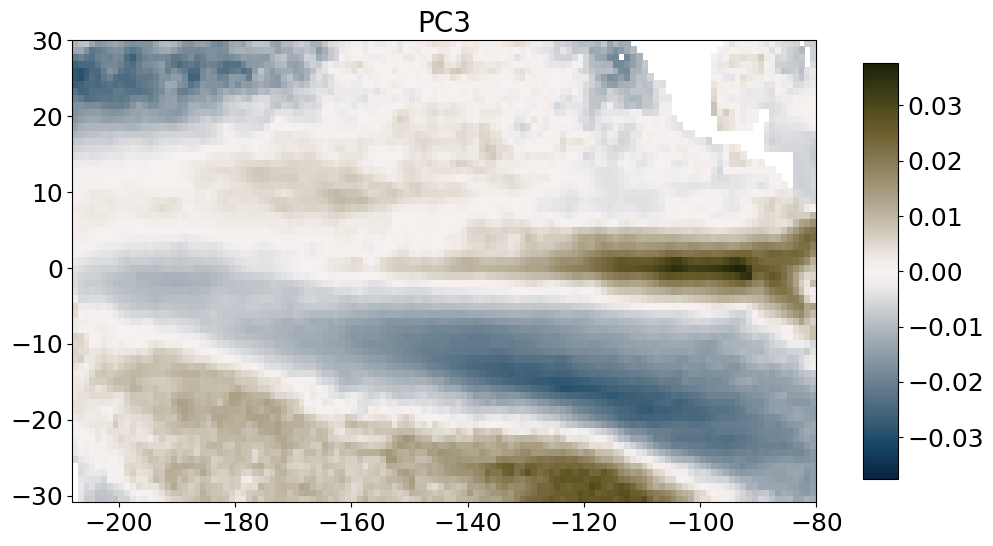

In [13]:
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)

fig, axs = plt.subplots(1, 1, figsize=(12,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       )
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,V[2,:]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

# axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
# gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.yrotation = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.9)
plt.title("PC3",fontsize=20)

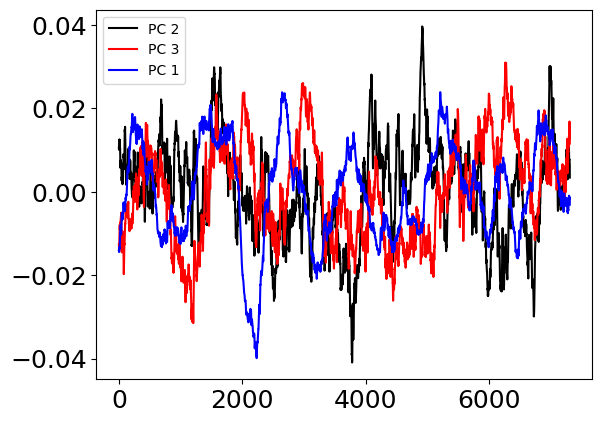

In [14]:
plt.plot(U[:,1],"k",label = "PC 2")
plt.plot(U[:,2],"r",label = "PC 3")
plt.plot(U[:,0],"b",label = "PC 1")

plt.legend()
# plt.plot(U[:,3])

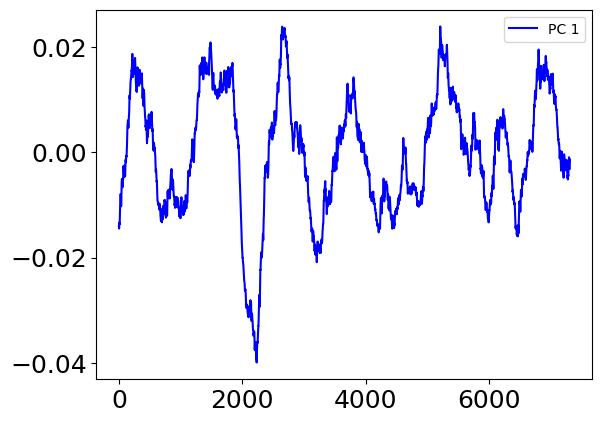

In [15]:
plt.plot(U[:,0],"b",label = "PC 1")
plt.legend()

Text(0, 0.5, '$\\sigma$')

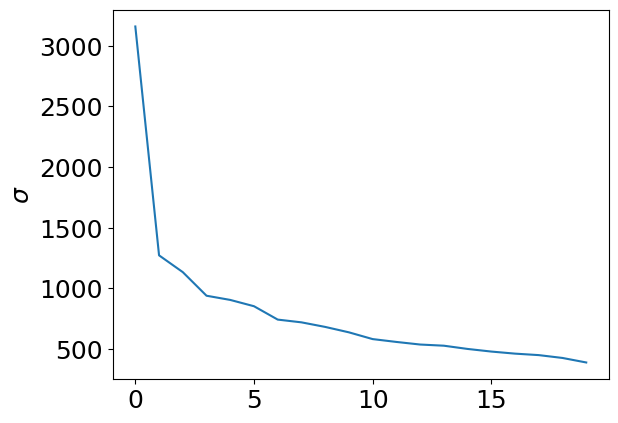

In [16]:
plt.plot(S[:20])
plt.ylabel(r"$\sigma$")

In [17]:
recon= V[0,:]/U[0,0]+V[1,:]/U[0,1]+V[2,:]/U[0,2]

/state/partition1/job-46589970/ipykernel_1778859/3278268009.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(plot_1,aspect=12,shrink=.9)


Text(0.5, 1.0, 'PC3')

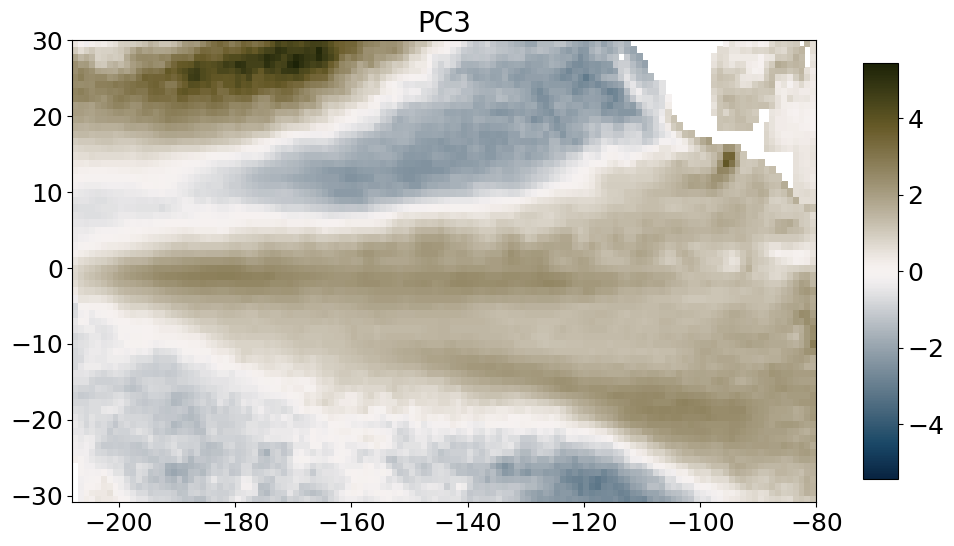

In [18]:
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)

fig, axs = plt.subplots(1, 1, figsize=(12,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       )
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,recon),cmap = cmocean.cm.diff,norm = colors.CenteredNorm(),
                   )

# axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
# gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.yrotation = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.9)
plt.title("PC3",fontsize=20)

/state/partition1/job-46589970/ipykernel_1778859/2284862470.py:20: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(plot_1,aspect=12,shrink=.9)


Text(0.5, 1.0, 'PC3')

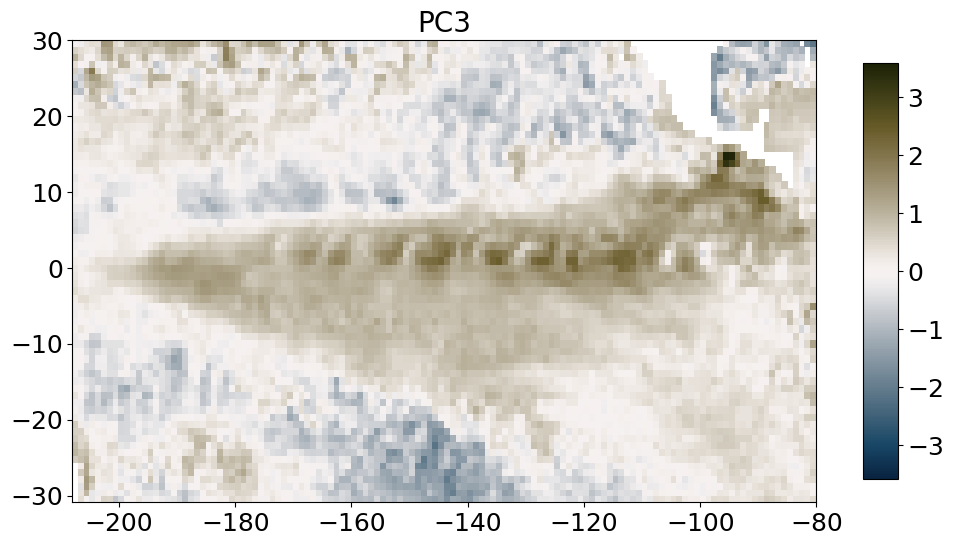

In [19]:
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('figure', titlesize=18)

fig, axs = plt.subplots(1, 1, figsize=(12,6),
                        gridspec_kw={'width_ratios': [1], 'height_ratios': [1], 'wspace': 0.25,'hspace':.5},
                       )
plot_1 = axs.pcolor(data.xu_ocean,data.yu_ocean,grid_vec(locs,flattened[0]),cmap = cmocean.cm.diff,norm = colors.CenteredNorm())

# axs.add_feature(cart.feature.LAND, zorder=100, edgecolor='k')
# gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.yrotation = False
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
axs.set_title(r"CM2.6",size = 15)
plt.colorbar(plot_1,aspect=12,shrink=.9)
plt.title("PC3",fontsize=20)

In [ ]:
recon= V[:20,:]/U[:500,:20]+V[1,:]/U[0,1]+V[2,:]/U[0,2]